# 1.1.1 Пример

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
0.9999999999999999 -0.9499999999999995


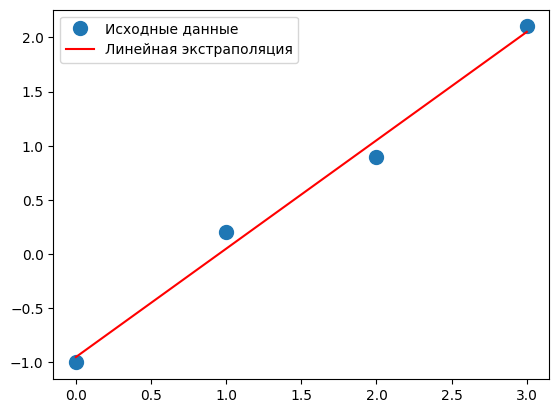

In [298]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

# Перепишем линейное уравнение у = mx + с как у = Ар, где А - [[ х 1 ]] и р - [[т], [с]]
# Построим А по х :

A = np.vstack([x, np.ones(len(x))]).T
print(A)

# Используея метод Lstsq для решения его относительно вектора р.
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

# Построим график полученной прямой и укажем на нем точки.
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

# 1.1.2 Пример

[-4.79880551 -3.77695567 -3.08487239 -2.15926119 -0.59379608  0.15881469
  0.73279576  2.32188685  3.3373287   4.24482245  4.71208318]
[24.90532751 16.39147641  8.73878128  3.50837127  1.15895405  0.08583464
  0.79513558  4.10357492  9.49298362 16.29479575 25.17191393]


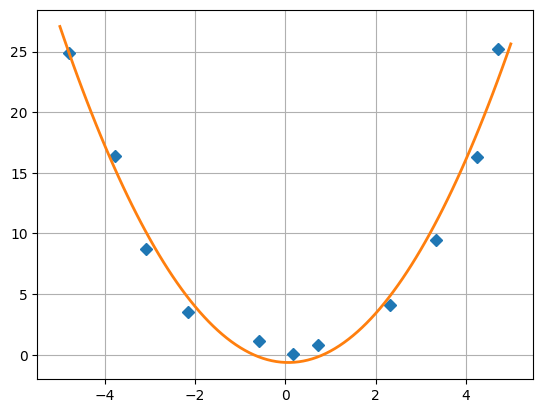

In [299]:
from numpy import *
from numpy.random import *

#Сгенерируем случайные x и у 
delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5) 
x += delta*(rand(11)-0.5)

# записывае данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

# читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

#Нахождение коэффициентов функции вида у = ах^2 + Ьх + с методом наименьших квадратов
#задаем вектор т = [х**2, х, Е]
m = vstack((x**2, x, ones(11))).T

#находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]

#на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)

#рисуем точки
plt.plot(x, y, 'D')

#рисуем кривую вида у = ахЛ2 + Ьх + с, подставляя из решения коэффициенты з[0], s[l]j s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2],'-', lw=2)
plt.grid()
plt.savefig('парабола.png')

# 1.1.3 Пример

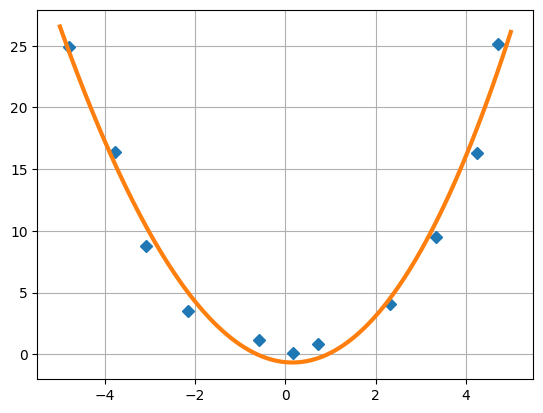

In [300]:
#Решение
#Нахождение коэффициентов функции вида у = ах^3 + bх^2 + сх + d методом наименьших квадратов
#задаем вектор т = [x**3, х, Е]
m = vstack((x**3, x**2, x, ones(11))).T
#находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]

#на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
#рисуем точки
plt.plot(x, y, 'D')
#рисуем кривую вида у = ах^3 + bx^2 + сх + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3],'-', lw = 3)
plt.grid()
plt.savefig('полином 3-й степени.png')

# Задание

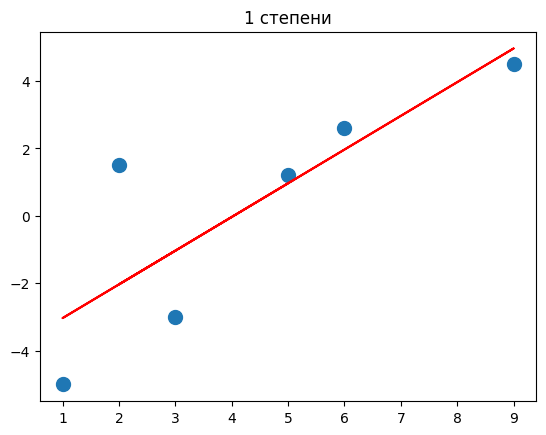

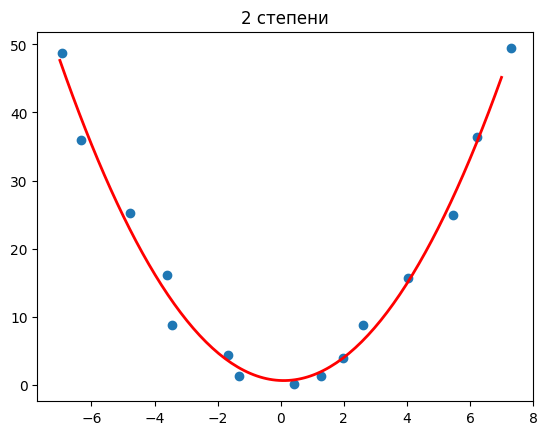

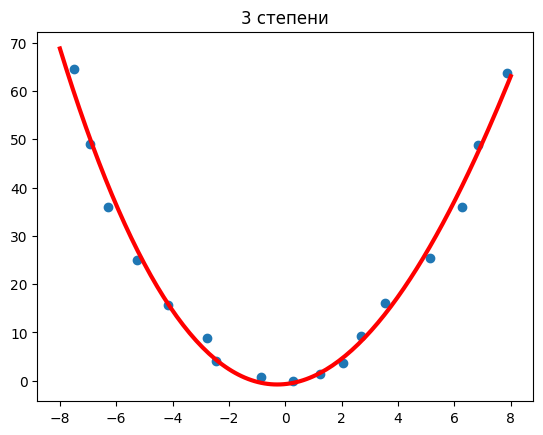

In [301]:
# Представьте собственные данные и постройте экстраполяцию полиномами первой, второй и третьей степени.

# 1 степени
x = np.array([3, 1, 6, 9, 2, 5])
y = np.array([-3, -5, 2.6, 4.5, 1.5, 1.2])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
plt.plot(x, y, 'o', markersize=10)
plt.plot(x, m*x + c, 'r')
plt.title("1 степени")
plt.show()

# 2 степени
delta = 1.0
x = linspace(-7,7,15)
y = x**2+delta*(rand(15)-0.5) 
x += delta*(rand(15)-0.5)
m = vstack((x**2, x, ones(15))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]
x_prec = linspace(-7, 7, 140)
plt.plot(x, y, 'o')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2],'r', lw=2)
plt.title("2 степени")
plt.show()

#3 степени
delta = 1.0
x = linspace(-8,8,17)
y = x**2+delta*(rand(17)-0.5) 
x += delta*(rand(17)-0.5)
m = vstack((x**3, x**2, x, ones(17))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]
x_prec = linspace(-8, 8, 140)
plt.plot(x, y, 'o')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3],'r', lw = 3)
plt.title("3 степени")
plt.show()

# 1.1.4 Пример

[0.24402482 0.75609865 0.4915717 ]
0.00014679227232301006
0.07684363188770248
[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[0.9718983  1.01199238 0.97402109 0.96267951 0.96617597 0.959846
 0.90409631 0.75378124 0.74893969 0.759249   0.68864746 0.61300018
 0.63808061 0.55294927 0.59836319 0.52910151 0.4437546  0.44058967
 0.40691139 0.2409039  0.2779622  0.29163388 0.33874343 0.26735707
 0.32872031 0.32644269 0.29470652 0.28251267 0.25554733 0.24298697
 0.26646237 0.25294472 0.1990

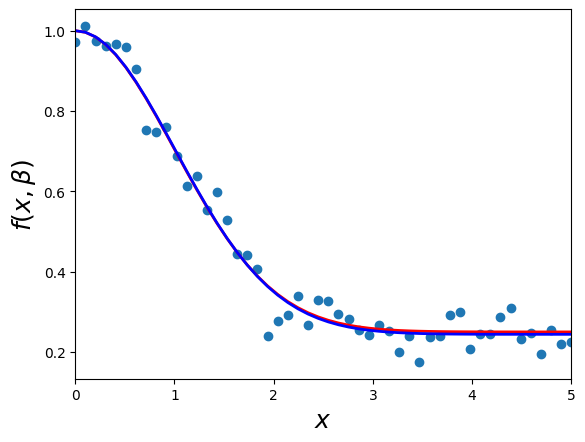

In [302]:
from scipy.optimize import curve_fit

#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5) 
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

#зададим массив точек хi
xdata = np.linspace(0, 5, 50)

#создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

#Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata) 
print(beta_opt)

#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

print(xdata)
print(ydata)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()


# 1.1.5 Пример

[0.25466833 0.74910956]
0.00011750871499908346
0.10332662770083184


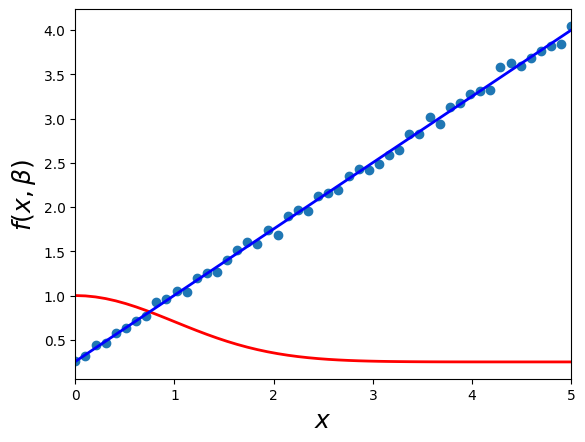

[0.25338876 0.75433123 0.49914745]
0.00013318704597651128
0.11106404776307326


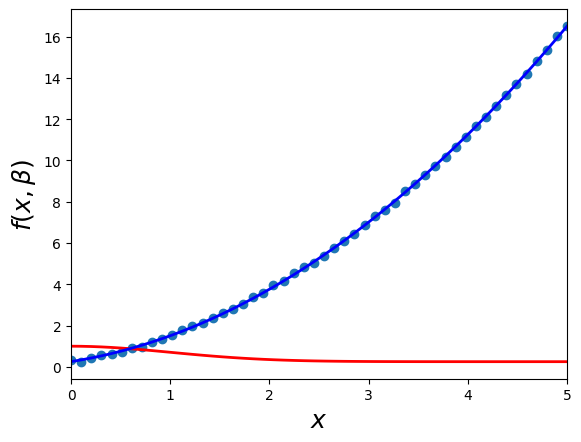

[1.00133087 1.99833849]
5.68033137690811e-05
0.13135433416944955


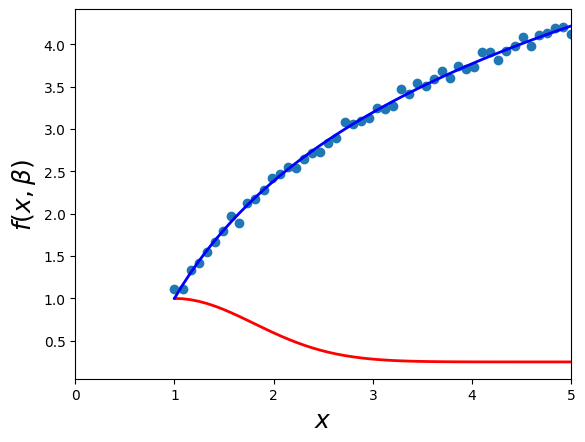

[0.99805814 2.00198141]
4.230897741271333e-06
0.10148702394243732


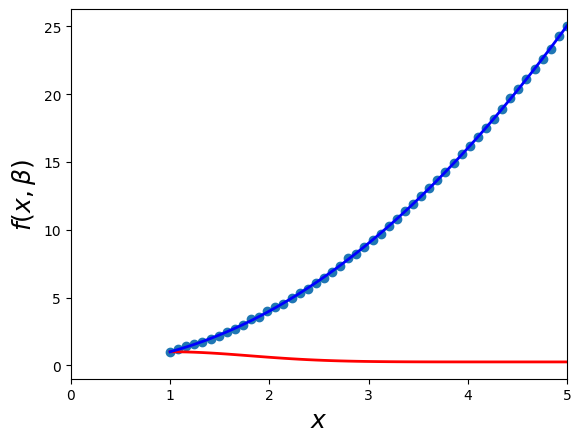

In [303]:
# решение
# 1
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x
# зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
у = f(xdata, *beta)
# зашумляем эти данные
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
# Вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# решение 
# 2
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
# зададим массив точек хi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
у = f(xdata, *beta)
# зашумляем эти данные
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение 
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение 
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# решение
# З
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
# зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
у = f(xdata, *beta)
# зашумляем эти данные
ydata = у + 0.05 * np.random.randn(len(xdata)) 
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
# Вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# решение
# 4
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x ** b1
# зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
у = f(xdata, *beta)
# зашумляем эти данные
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
# Вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# Задание

[0.22916189 0.77572998 0.4477851 ]
0.0007512994125721351
0.04677677453697418


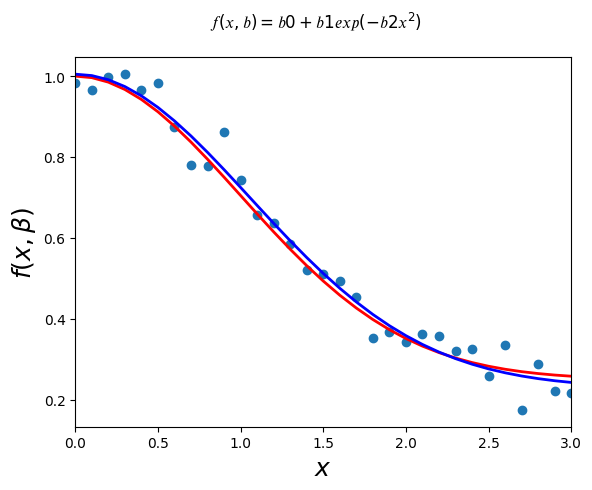

[0.26938679 0.73580721]
0.00019358527454738295
0.08982356725894129


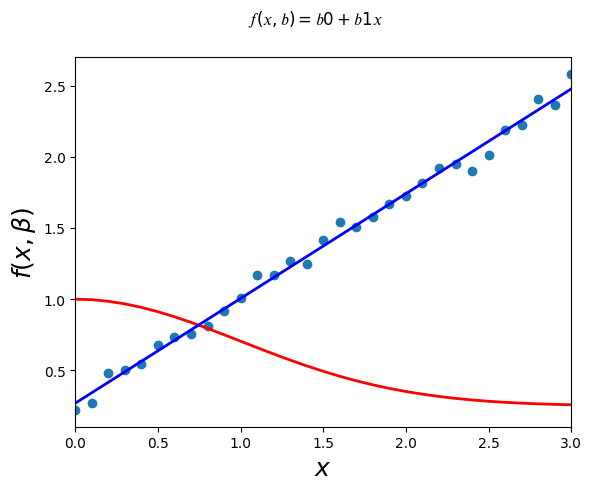

[0.24840413 0.74164455 0.50034408]
3.92588912396677e-05
0.09087119525443212


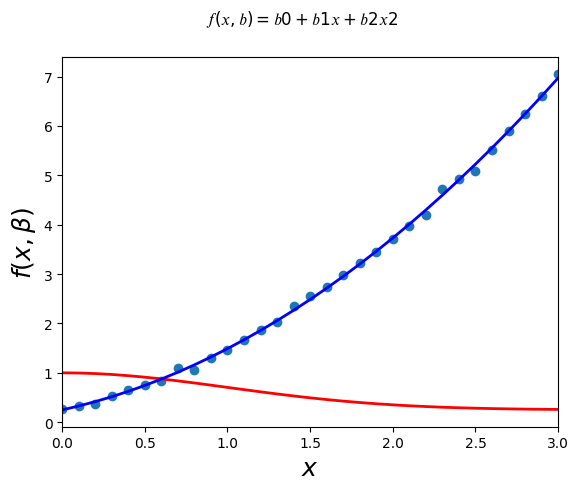

[1.00210668 2.00767931]
1.3964573227782235e-05
0.0771258454172888


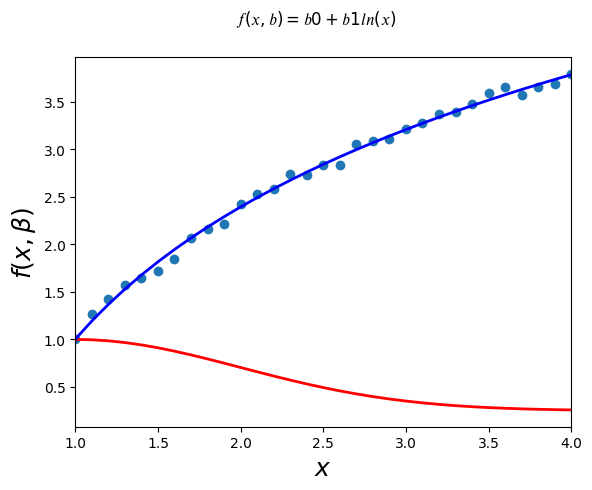

[0.99857509 2.00008064]
9.81262360107046e-06
0.08629835355879774


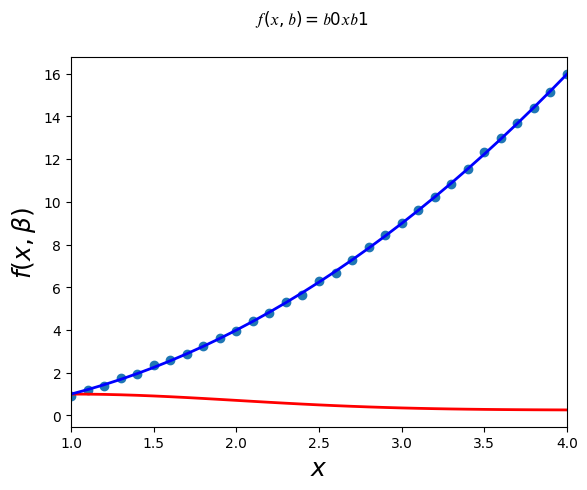

In [304]:
# Подставьте собственные данные и поэкспериментируйте с представленными функциями.
# Проанализируйте динамику изменения данных.

# 𝑓(𝑥,𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥^2)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
xdata = np.linspace(0, 3, 31)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata) 
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
fig.suptitle("$𝑓(𝑥,𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥^2)$", fontsize=12)
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 3)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# 𝑓(𝑥,𝑏) = 𝑏0 + 𝑏1𝑥
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x
xdata = np.linspace(0, 3, 31)
у = f(xdata, *beta)
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
fig.suptitle("$𝑓(𝑥,𝑏) = 𝑏0 + 𝑏1𝑥$", fontsize=12)
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 3)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# 𝑓(𝑥,𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥2
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
xdata = np.linspace(0, 3, 31)
у = f(xdata, *beta)
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
fig.suptitle("$𝑓(𝑥,𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥2$", fontsize=12)
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 3)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# 𝑓(𝑥,𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
xdata = np.linspace(1, 4, 31)
у = f(xdata, *beta)
ydata = у + 0.05 * np.random.randn(len(xdata)) 
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
fig.suptitle("$𝑓(𝑥,𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)$", fontsize=12)
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(1, 4)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# 𝑓(𝑥,𝑏) = 𝑏0 𝑥𝑏1
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x ** b1
xdata = np.linspace(1, 4, 31)
у = f(xdata, *beta)
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
fig.suptitle("$𝑓(𝑥,𝑏) = 𝑏0 𝑥𝑏1$", fontsize=12)
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(1, 4)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# 1.2.1 Пример

   Учебное время  Оценка
0           0.50      10
1           0.75      22
2           1.00      13
3           1.25      43
4           1.50      20
(20, 2)
       Учебное время     Оценка
count      20.000000  20.000000
mean        2.787500  53.700000
std         1.507165  26.435821
min         0.500000  10.000000
25%         1.687500  30.250000
50%         2.625000  58.500000
75%         4.062500  75.250000
max         5.500000  93.000000


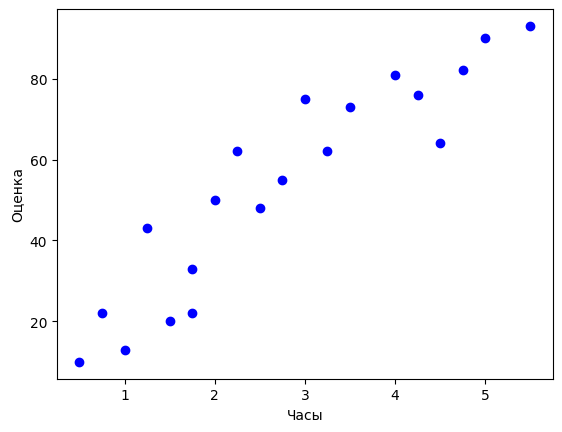

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
5.475400029908791
[17.02706744]
   Actual  Predicted
0      90  90.610737
1      22  18.245701
2      93  99.124271
3      62  43.786302


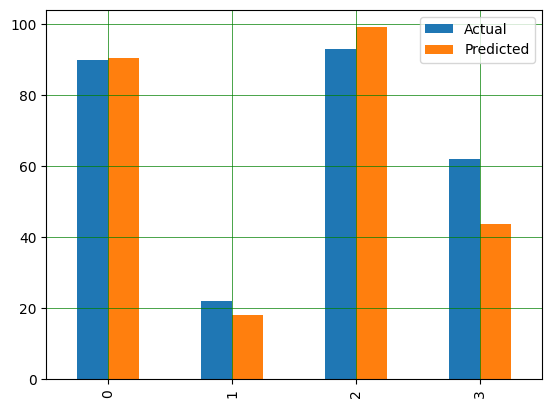

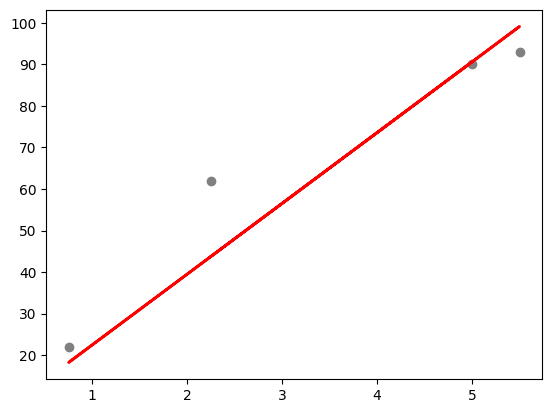

In [305]:
# Импортируем необходимые библиотеки
# используем pandas и питру для обработки данных,
# matpLotLib для визуализации и skLearn для обучения наборов данных и импорта моделей.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваемостью
my_dict = {'Учебное время': [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
'Оценка': [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}

dataset = pd.DataFrame(my_dict)
print(dataset.head())

# Исследуем набор данных
print(dataset.shape)
print(dataset.describe())

# Нарисуем точечную диаграмму
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()


X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values 
print(X)
print(y)
# Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на а обучающий и тестовый наборы.
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# далее можно обучить алгоритм линейной регрессии
# необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# приведем получившиеся коэффициенты для линии регрессии
print(regressor.intercept_)
print(regressor.coef_)




y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

# визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# построим линию регрессии с тестовыми данными
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

# Задание

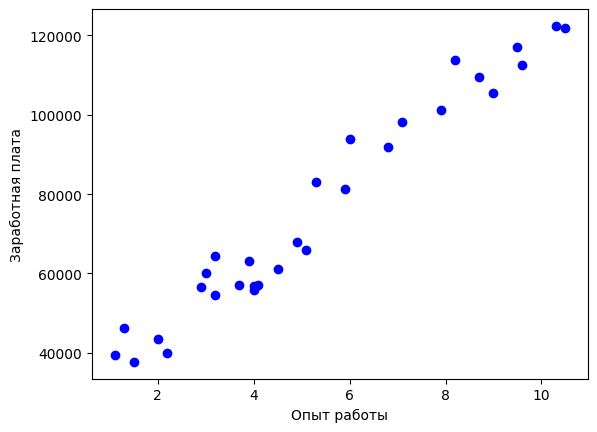

26780.09915062818

 [9312.57512673]

      Actual      Predicted
0   37731.0   40748.961841
1  122391.0  122699.622956
2   57081.0   64961.657170
3   63218.0   63099.142145
4  116969.0  115249.562855
5  109431.0  107799.502753


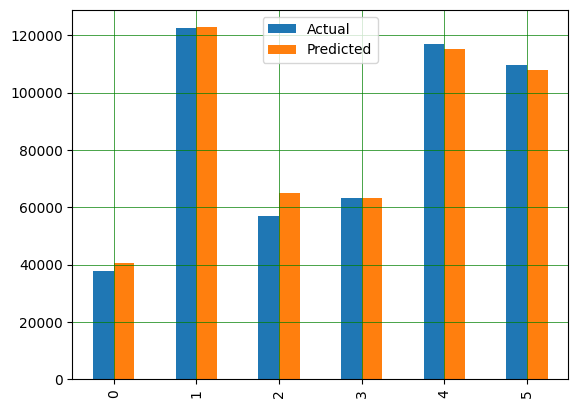

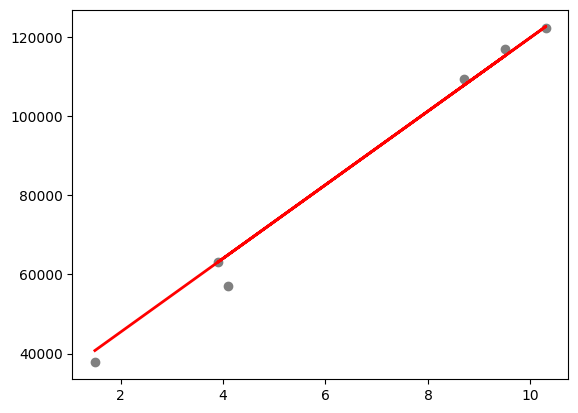

In [306]:
# Постройте модель линейной регрессии для произвольных данных из двух столбцов.
# Для примера можно взять точечную зависимость заработной платы от опыта работы:
# (https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv).
# Найдите коэффициенты линии регрессии. Постройте прогноз.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


dataset = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
# print(dataset.head())
# print(dataset.shape)
# print(dataset.describe())

plt.scatter(dataset['YearsExperience'], dataset['Salary'], color = 'b', label = "Данные заработных плат")
plt.xlabel("Опыт работы")
plt.ylabel("Заработная плата")
plt.show()

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values 
# print(X)
# print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print("\n", regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\n", df)

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

# 1.3.1 Пример

In [307]:
import numpy as np

y = [1,2,3,4,3,4,5, 3, 5,5,4,5,4,5,4, 5,6,0,6,3,1,3,1]
x = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
x = np.transpose(x) # transpose so input vectors
x = np.c_[x, np.ones(x.shape[0])] # add bias term
linreg = np.linalg.lstsq(x, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


# 1.3.2 Пример

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

# формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns={0: 'y'}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
print(dataset.head())

# изучим данные
print(dataset.shape)
print(dataset.describe())

# разделил данные на метки и атрибуты
X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#для обучения алгоритма мы выполняем тот же код, что и раныие, используя метод fit() класса LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print("\n", coeff_df)

#Чтобы сделать прогнозы на тестовых данных, выполните следующий код
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\n", df)

#Последний шаг - оценить производительность алгоритма. Мы сделаем это, найдя значения для MSE
print("\n", 'Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

   y  x1  x2  x3
0  1   0   4   4
1  2   2   1   1
2  3   4   2   2
3  4   1   3   5
4  3   5   4   6
(23, 4)
               y         x1         x2         x3
count  23.000000  23.000000  23.000000  23.000000
mean    3.565217   5.347826   5.521739   5.043478
std     1.674029   2.404706   2.428422   2.704849
min     0.000000   0.000000   1.000000   1.000000
25%     3.000000   4.500000   4.000000   3.000000
50%     4.000000   5.000000   6.000000   5.000000
75%     5.000000   6.500000   7.500000   7.000000
max     6.000000   9.000000   9.000000   9.000000

     Coefficient
x1     0.223219
x2     0.136709
x3    -0.063757

     Actual  Predicted
11       5   4.119478
10       4   3.153648
21       3   3.199155
14       4   4.078333
20       1   3.258079

 Mean Squared Error: 1.327269924234306


# Задание

In [309]:
# Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов.
# Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно.
# Найдите коэффициенты множественной регрессии. Постройте прогноз.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

dataset = pd.read_csv('https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv')
print(dataset.shape)
print(dataset.describe())

X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\n", df)

print('\n Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

(48, 5)
       Petrol_tax  Average_income  Paved_Highways  \
count   48.000000       48.000000       48.000000   
mean     7.668333     4241.833333     5565.416667   
std      0.950770      573.623768     3491.507166   
min      5.000000     3063.000000      431.000000   
25%      7.000000     3739.000000     3110.250000   
50%      7.500000     4298.000000     4735.500000   
75%      8.125000     4578.750000     7156.000000   
max     10.000000     5342.000000    17782.000000   

       Population_Driver_licence(%)  Petrol_Consumption  
count                     48.000000           48.000000  
mean                       0.570333          576.770833  
std                        0.055470          111.885816  
min                        0.451000          344.000000  
25%                        0.529750          509.500000  
50%                        0.564500          568.500000  
75%                        0.595250          632.750000  
max                        0.724000          968.0

# Задание

     x  lin_extra
0  3.0   4.809524
1  3.2   4.552381
2  3.4   4.295238
3  3.6   4.038095
4  3.8   3.780952
5  4.0   3.523810


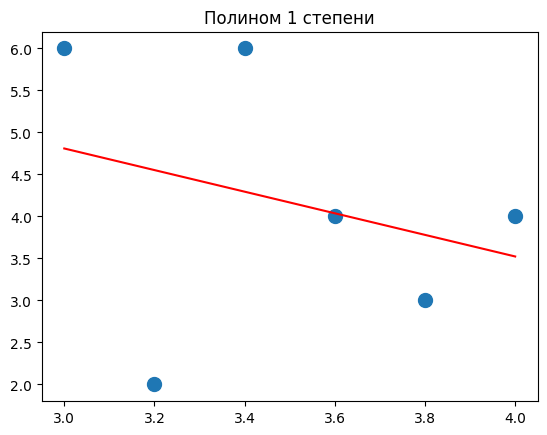

     x  lin_extra
0  3.0   5.107143
1  3.2   4.492857
2  3.4   4.057143
3  3.6   3.800000
4  3.8   3.721429
5  4.0   3.821429


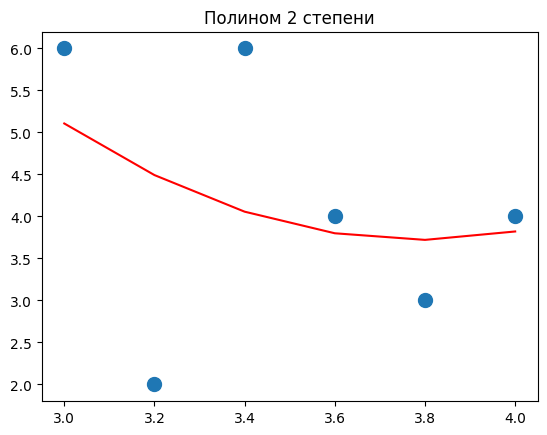

In [311]:
# Экспериментально получены N − значений величины Y при различных значениях величины X.
# Построить полиномы первой и второй степени, аппроксимирующие результаты эксперимента,
# с применением метода наименьших квадратов. Результаты выводятся в виде таблиц значений и графиков, полученных полиномов.
# Вариант №4

import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *

# Полином 1 степени
x = np.array([3.0,3.2,3.4,3.6,3.8,4.0])
y = np.array([6.0,2.0,6.0,4.0,3.0,4.0])
A = np.vstack([x,np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond = None)[0]

new_x = x.transpose()
df1 = pd.DataFrame(new_x)
new_y = m * x + c
new_y = new_y.transpose()
df2 = pd.DataFrame(new_y)
df1 = df1.rename(columns={0: 'x'}, inplace=False)
df2 = df2.rename(columns={0: 'lin_extra'}, inplace=False)
dataset = pd.concat([df1, df2], axis=1, join="inner")
print(dataset)

plt.plot(x, y, 'o', markersize=10)
plt.plot(x, m * x + c, 'r')
plt.title("Полином 1 степени")
plt.show()

# Полином 2 степени
m = vstack((x**2, x, ones(6))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

new_y = s[0] * x**2 + s[1] * x+s[2]
new_y = new_y.transpose()
df2 = pd.DataFrame(new_y)
df2 = df2.rename(columns={0: 'lin_extra'}, inplace=False)
dataset = pd.concat([df1, df2], axis=1, join="inner")
print(dataset)

plt.plot(x, y, 'o', markersize=10)
plt.plot(x, s[0] * x**2 + s[1] * x+s[2], 'r')
plt.title("Полином 2 степени")
plt.show()